# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
2. Scroll down to API and click Create New API Token.
3. Open up `kaggle.json` and use the username and key.

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [ ]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 60.2.0
    Uninstalling setuptools-60.2.0:
      Successfully uninstalled setuptools-60.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
openxlab 0.0.38 requires setuptools~=60.2.0, but you have setuptools 69.5.1 which is incompatible.


ERROR: Operation cancelled by user


### Setup Kaggle API Key

In [ ]:
# Install kaggle
!pip install kaggle

# Create the .kaggle directory in /root/
!mkdir -p ~/.kaggle

# Create an empty kaggle.json file in the new .kaggle directory
!touch ~/.kaggle/kaggle.json

# Set appropriate permissions for the Kaggle API key file to ensure security
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Fill in your user name and key from creating the kaggle account and API token file
import os
import json

kaggle_username = "my_kaggle_username"
kaggle_key = "my_kaggle_api-key"

# Get the path to the home directory
home = os.path.expanduser("~")

# Create the .kaggle directory in the home directory
!mkdir -p {home}/.kaggle

# Set appropriate permissions for the Kaggle API key file to ensure security
!chmod 600 {home}/.kaggle/kaggle.json

# Save API token the kaggle.json file
with open(os.path.join(home, ".kaggle/kaggle.json"), "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms

In [ ]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
# Load train dataset
train = pd.read_csv('/content/train.csv', parse_dates=['datetime'])

# Display first few rows of train dataset
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
print("Summary statistics of train dataset:")
train.describe()

Summary statistics of train dataset:


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [ ]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
# Load test dataset
test = pd.read_csv('/content/test.csv', parse_dates=['datetime'])

# Display first few rows of test dataset
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
# Same thing as train and test dataset
# Load sample submission dataset
submission = pd.read_csv('/content/sampleSubmission.csv')

# Display first few rows of submission dataset
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
"""Since the 'casual' and 'registered' columns are not present \
in the test dataset but are available in the training dataset, \
it's essential to handle this discrepancy. Since the task requires \
predicting the 'count' column, we can safely ignore the 'casual' and \
'registered' columns for training the model. We can drop these columns \
from the training dataset before training the model."""
train = train.drop(columns=['casual', 'registered'])

# Train the model
predictor = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_211606"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_211606/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 215 seconds

### Review AutoGluon's training run with ranking of models that did the best.

In [ ]:
# Review AutoGluon's training run with ranking of models that did the best.
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.066854  root_mean_squared_error      55.163926  361.237957                0.001292           0.054325            3       True         10
1         LightGBM_BAG_L2  -55.106094  root_mean_squared_error      49.824168  278.989629                0.328317          42.290116            2       True          9
2       LightGBMXT_BAG_L2  -60.711688  root_mean_squared_error      54.834317  318.893516                5.338466          82.194003            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.090871    0.058939                0.090871           0.058939            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.092352    0.107026         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -132.12574669370798,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.71168787502696,
  'LightGBM_BAG_L2': -55.106093871534405,
  'WeightedEnsemble_L3': -55.06685358768445}

### Create predictions from test dataset

In [ ]:
# Create predictions from the test dataset
predictions = predictor.predict(test)

# Display first few rows of predictions
predictions.head()

0    36.919998
1    45.451775
2    49.321945
3    53.542290
4    54.564552
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [ ]:
# Describe the `predictions` series to see if there are any negative values
print(predictions.describe())

count    6493.000000
mean       99.546867
std        89.662758
min        -8.414003
25%        16.569002
50%        63.928410
75%       171.246750
max       371.817078
Name: count, dtype: float64


In [ ]:
# How many negative values do we have?
# Count how many negative values do we have
num_negatives = (predictions < 0).sum()
print("Number of negative values:", num_negatives)

Number of negative values: 2


In [ ]:
# Set them to zero
# Set negative predictions to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [ ]:
# Set predictions to submission dataframe, save, and submit
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [ ]:
# Submit the predictions to the Kaggle competition "bike-sharing-demand" using the Kaggle CLI,
# with the submission file "submission.csv" and a descriptive message "first raw submission"
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 254kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-04-30 21:29:58  first raw submission               complete  1.83892      1.83892       
submission.csv               2024-04-30 21:28:13  first raw submission               complete  1.83892      1.83892       
submission_new_hpo.csv       2024-04-30 11:42:05  new features with hyperparameters  complete  0.49123      0.49123       
submission_new_features.csv  2024-04-30 10:58:38  new features                       complete  0.6207       0.6207        


#### Initial score of `1.83892`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

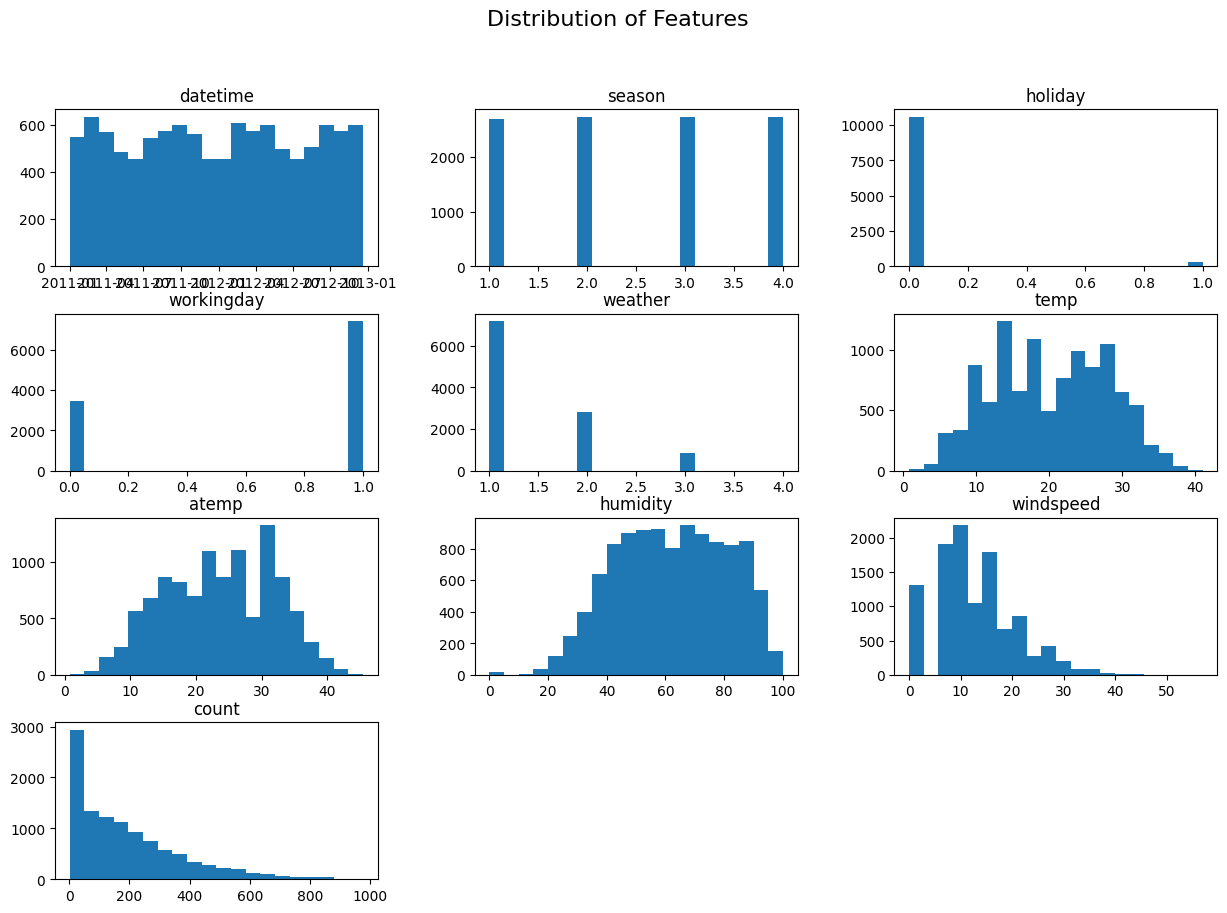

In [ ]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
# Exploratory Data Analysis (EDA)
# Visualize the distribution of each feature using histograms
import matplotlib.pyplot as plt
train.hist(figsize=(15, 10), bins=20, grid=False)
plt.suptitle("Distribution of Features", fontsize=16)
plt.show()

In [ ]:
# Create a new feature 'hour' by extracting the hour part from the datetime column
train['hour'] = train['datetime'].dt.hour
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [ ]:
# Convert 'season' and 'weather' columns to categorical types
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [ ]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


First few rows of train dataset with the 'hour' feature:
             datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  count  hour  
0        81        0.0     16     0  
1        80        0.0     40     1  
2        80        0.0     32     2  
3        75        0.0     13     3  
4        75        0.0      1     4  


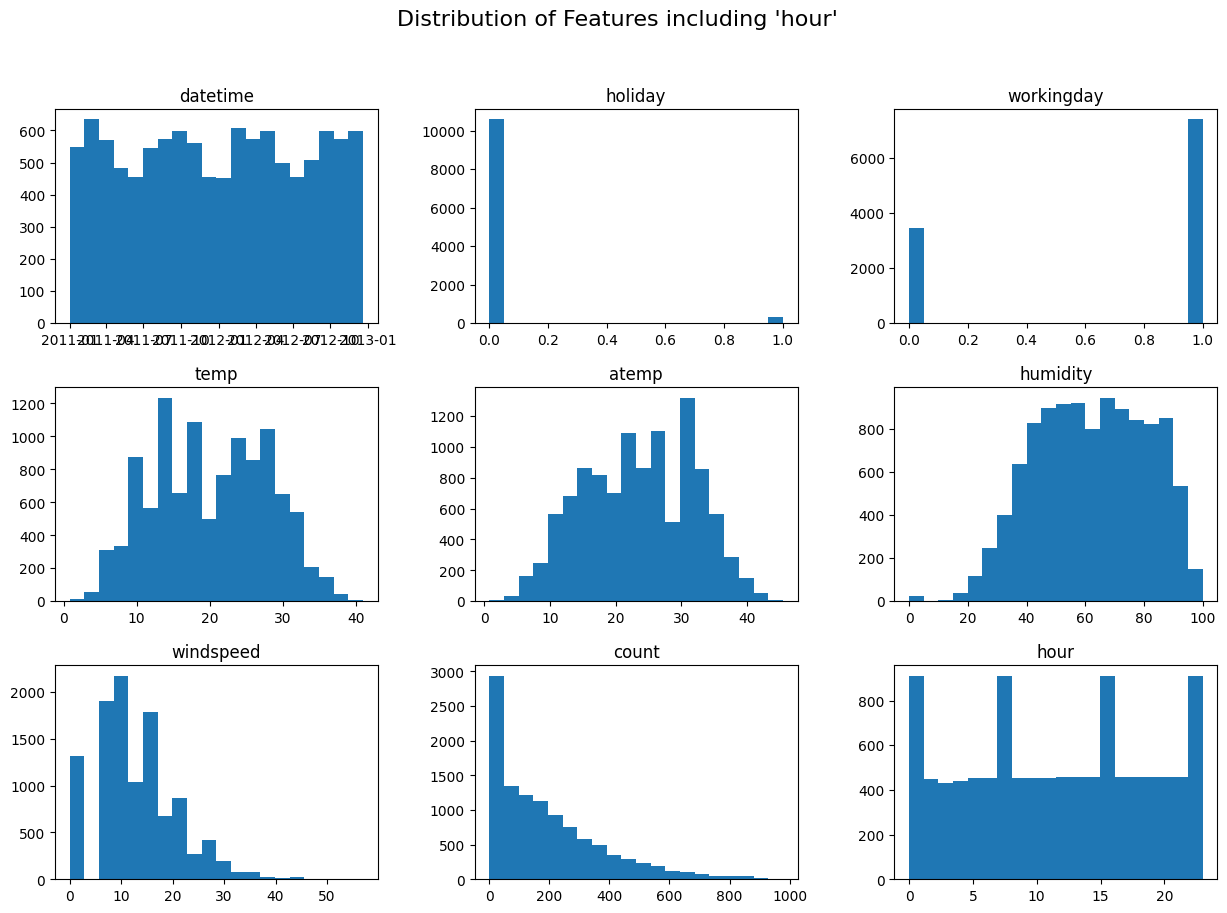

In [ ]:
# View histogram of all features again now with the hour feature
# View the first few rows of the train dataset to verify the addition of the 'hour' feature
print("First few rows of train dataset with the 'hour' feature:")
print(train.head())

# View histogram of all features again now with the 'hour' feature
train.hist(figsize=(15, 10), bins=20, grid=False)
plt.suptitle("Distribution of Features including 'hour'", fontsize=16)
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [ ]:
# Train the model with additional features
predictor_new_features = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(train_data=train, time_limit=600, presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_213153"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_213153/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 213 seconds

In [ ]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -30.428847  root_mean_squared_error      52.220520  362.390117                0.001204           0.054599            3       True         10
1         LightGBM_BAG_L2  -30.667943  root_mean_squared_error      49.794716  270.815830                0.649112          41.834797            2       True          8
2       LightGBMXT_BAG_L2  -31.218084  root_mean_squared_error      50.872662  274.568516                1.727058          45.587483            2       True          7
3  RandomForestMSE_BAG_L2  -31.997543  root_mean_squared_error      49.843146  274.913238                0.697543          45.932205            2       True          9
4     WeightedEnsemble_L2  -32.370365  root_mean_squared_error      48.942731  229.051562         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'WeightedEnsemble_L2': -32.37036514580666,
  'LightGBMXT_BAG_L2': -31.218084362745092,
  'LightGBM_BAG_L2': -30.667943332228102,
  'RandomForestMSE_BAG_L2': -31.997543164524284,
  'WeightedEnsemble_L3': -30.428846

In [ ]:
# Remember to set all negative values to zero
"""As negative predictions are not meaningful in this context, \
it's crucial to set them to zero to comply with Kaggle's submission \
requirements. """
# This ensures that all predictions are non-negative.
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = predictions_new_features.clip(lower=0)

In [ ]:
# Same submitting predictions
""" Set predictions with new features to the submission dataframe, save \
it to a CSV file, and submit it to the Kaggle competition. """
submission_new_features = pd.read_csv('/content/sampleSubmission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:00<00:00, 309kB/s]  
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-30 21:46:13  new features                       complete  0.62523      0.62523       
submission.csv               2024-04-30 21:29:58  first raw submission               complete  1.83892      1.83892       
submission.csv               2024-04-30 21:28:13  first raw submission               complete  1.83892      1.83892       
submission_new_hpo.csv       2024-04-30 11:42:05  new features with hyperparameters  complete  0.49123      0.49123       


#### New Score of `0.62523`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [ ]:
# Define the hyperparameters for the model
hyperparameters = {
    'GBM': {'num_boost_round': 100, 'num_leaves': 10},  # Example for LightGBM model
    'CAT': {'iterations': 100}  # Example for CatBoost model
}

# Define the hyperparameter tuning settings
hyperparameter_tune_kwargs = {
    'num_trials': 5,  # Number of trials for HPO
    'scheduler' : 'local',  # Scheduler for HPO
    'searcher': 'random'  # Searcher algorithm for HPO
}

# Train the model with hyperparameter optimization
predictor_new_hpo = TabularPredictor(label='count', eval_metric='root_mean_squared_error').fit(
    train_data=train,
    time_limit=600,
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240430_214700"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240430_214700/ds_sub_fit/sub_fit_ho.
Running the sub-fit in a ray process to avoid memory leakage.
Spend 147 seconds

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.06%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-56.0012	 = Validation score   (-root_mean_squared_error)
	36.39s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-49.9481	 = Validation score   (-root_mean_squared_error)
	38.38s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-45.3082	 = Validation score   (-root_mean_squared_error)
	39.41s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 135.76s of the 338.21s of re

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.07%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.25%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-55.9695	 = Validation score   (-root_mean_squared_error)
	31.38s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T2 ...
	-49.5419	 = Validation score   (-root_mean_squared_error)
	31.78s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T3 ...
	-62.963	 = Validation score   (-root_mean_squared_error)
	34.44s	 = Training   runt

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.08%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-41.9793	 = Validation score   (-root_mean_squared_error)
	36.75s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-41.6214	 = Validation score   (-root_mean_squared_error)
	37.02s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 88.65s of the 122.97s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.14%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.10%)
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-43.1874	 = Validation score   (-root_mean_squared_error)
	33.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L2/T2 ...
	-41.7524	 = Validation score   (-root_mean_squared_error)
	31.84s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 57.44s of remaining time.
	Ensemble Weights: {'LightGBM_BAG_L2/T2': 0.55, 'CatBoost_BAG_L2/T2': 0.45}
	-41.3668	 = Validation score   (-root_mean_squared_error)
	0.06s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 395.68s ... Best model: "WeightedEnsemble_L3"


In [ ]:
# Review AutoGluon's training run with ranking of models that did the best.
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -41.366805  root_mean_squared_error       0.004801  323.841944                0.001314           0.058850            3       True         13
1    LightGBM_BAG_L2/T2 -41.621439  root_mean_squared_error       0.003168  291.947508                0.000338          37.022625            2       True         10
2    CatBoost_BAG_L2/T2 -41.752438  root_mean_squared_error       0.003149  286.760469                0.000319          31.835585            2       True         12
3    LightGBM_BAG_L2/T1 -41.979315  root_mean_squared_error       0.003051  291.673368                0.000221          36.748485            2       True          9
4    CatBoost_BAG_L2/T1 -43.187351  root_mean_squared_error       0.003108  288.332504                0.000278   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T3': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T4': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L2/T2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -56.001162826493214,
  'LightGBM_BAG_L1/T2': -49.948119282463814,
  'LightGBM_BAG_L1/T3': -45.308155521798334,
  'CatBoost_BAG_L1/T1': -55.969466336614005,
  'CatBoost_BAG_L1/T2': -49.54191516173068,
  'CatBoost_BAG_L1/T3': -62.962971499

In [ ]:
# Create predictions from the test dataset
predictions_new_hpo = predictor_new_hpo.predict(test)

# Remember to set all negative values to zero
predictions_new_hpo = predictions_new_hpo.clip(lower=0)

In [ ]:
# Load sample submission dataset
submission_new_hpo = pd.read_csv('/content/sampleSubmission.csv')

# Set predictions to submission dataframe
submission_new_hpo["count"] = predictions_new_hpo

# Save and submit
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [ ]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:00<00:00, 377kB/s]
Successfully submitted to Bike Sharing Demand

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-30 21:57:12  new features with hyperparameters  complete  0.514        0.514         
submission_new_features.csv  2024-04-30 21:46:13  new features                       complete  0.62523      0.62523       
submission.csv               2024-04-30 21:29:58  first raw submission               complete  1.83892      1.83892       
submission.csv               2024-04-30 21:28:13  first raw submission               complete  1.83892      1.83892       


**bold text**#### New Score of `0.514`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Print the columns of the leaderboard DataFrame
print(predictor.fit_summary()['leaderboard'].columns)

*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.066854  root_mean_squared_error      55.163926  361.237957                0.001292           0.054325            3       True         10
1         LightGBM_BAG_L2  -55.106094  root_mean_squared_error      49.824168  278.989629                0.328317          42.290116            2       True          9
2       LightGBMXT_BAG_L2  -60.711688  root_mean_squared_error      54.834317  318.893516                5.338466          82.194003            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.090871    0.058939                0.090871           0.058939            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.092352    0.107026         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


*** Summary of fit() ***
Estimated performance of each model:
                    model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -55.066854  root_mean_squared_error      55.163926  361.237957                0.001292           0.054325            3       True         10
1         LightGBM_BAG_L2  -55.106094  root_mean_squared_error      49.824168  278.989629                0.328317          42.290116            2       True          9
2       LightGBMXT_BAG_L2  -60.711688  root_mean_squared_error      54.834317  318.893516                5.338466          82.194003            2       True          8
3   KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.090871    0.058939                0.090871           0.058939            1       True          2
4     WeightedEnsemble_L2  -84.125061  root_mean_squared_error       0.092352    0.107026         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')
/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because b

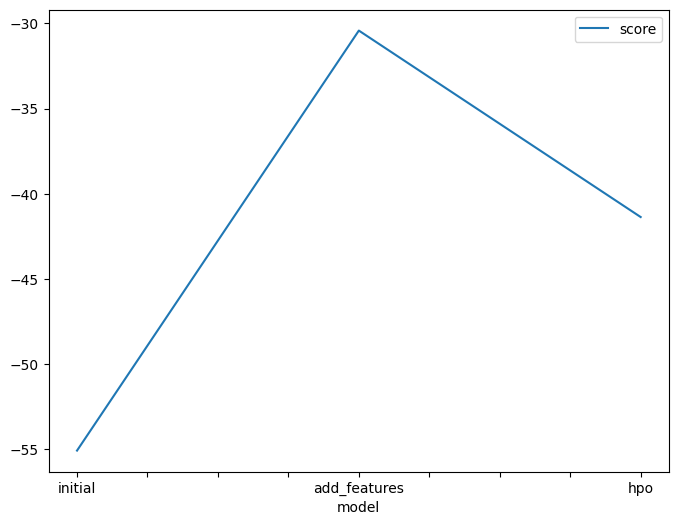

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
# Get the score of the top model from each training run
initial_score = predictor.fit_summary()['leaderboard']['score_val'].max()
add_features_score = predictor_new_features.fit_summary()['leaderboard']['score_val'].max()
hpo_score = predictor_new_hpo.fit_summary()['leaderboard']['score_val'].max()

# Create the plot
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [initial_score, add_features_score, hpo_score]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

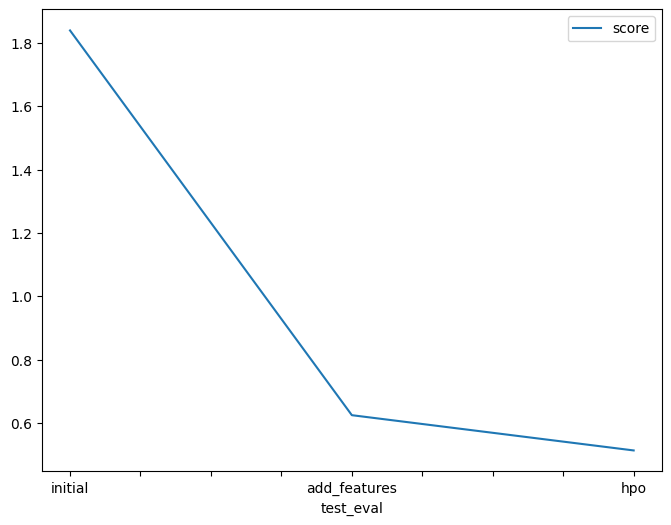

In [ ]:
# Take the 3 kaggle scores and creating a line plot to show improvement
initial_kaggle_score = 1.83892
add_features_kaggle_score = 0.62523
hpo_kaggle_score = 0.514

fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [initial_kaggle_score, add_features_kaggle_score, hpo_kaggle_score]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [ ]:
print(hyperparameters.keys())

dict_keys(['GBM', 'CAT'])


In [ ]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [None, None, hyperparameters['GBM']],
    "hpo2": [None, None, hyperparameters['CAT']],
    "score": [initial_kaggle_score, add_features_kaggle_score, hpo_kaggle_score]
})


,model,hpo1,hpo2,score
0,initial,None,None,1.83892
1,add_features,None,None,0.62523
2,hpo,"{'num_boost_round': 100, 'num_leaves': 10}",{'iterations': 100},0.51400
